<a href="https://colab.research.google.com/github/lalithasri07/dsa0216-ComputerVision/blob/main/Activity3_Regionbasedtracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

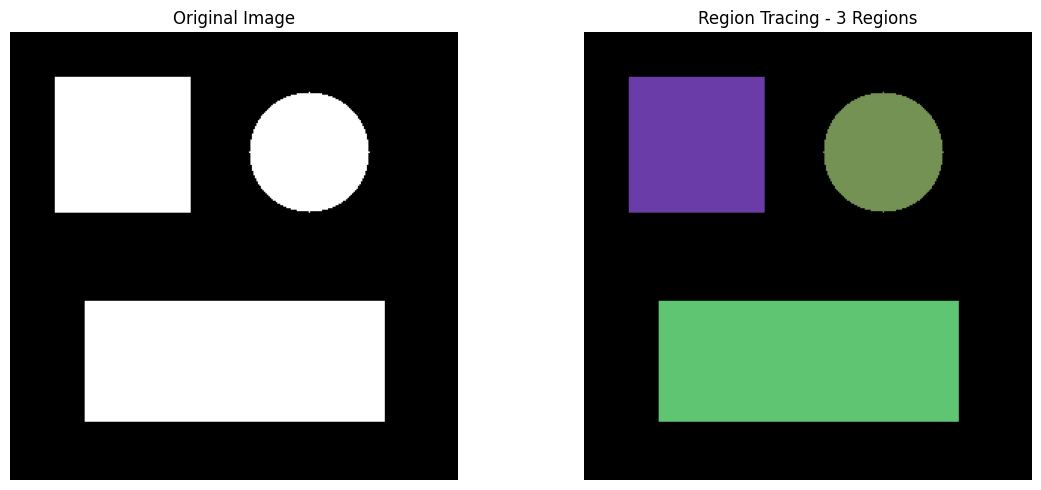

✅ Found 3 regions
Region 1: Area = 8281 pixels
Region 2: Area = 5025 pixels
Region 3: Area = 16281 pixels


In [2]:
# Install and import
!pip install opencv-python-headless matplotlib numpy scikit-image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage import measure

# Create sample image with regions
img = np.zeros((300, 300), dtype=np.uint8)
cv2.rectangle(img, (30, 30), (120, 120), 255, -1)     # Region 1
cv2.circle(img, (200, 80), 40, 255, -1)               # Region 2
cv2.rectangle(img, (50, 180), (250, 260), 255, -1)    # Region 3

# Region-based tracing using connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

# Create color image for display
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Generate random colors for each region
colors = np.random.randint(0, 255, size=(num_labels, 3))

# Color each region
for i in range(1, num_labels):  # Skip background (0)
    img_color[labels == i] = colors[i]

# Display
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_color)
plt.title(f'Region Tracing - {num_labels-1} Regions')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"✅ Found {num_labels-1} regions")
for i in range(1, num_labels):
    print(f"Region {i}: Area = {stats[i, cv2.CC_STAT_AREA]} pixels")